COE 292 - AI Classification Project
Team: 1
Dataset: Well Log Facies Classification Dataset
Date: April 10, 2025

Team members:
- Abdullah Al-Qisoom (202156590)
- Mohammed Alqadhib (202223600)
- Salman AlAmeer (202184310)
- Mohammed Aljafar (202260400)

In [ ]:
"""
This project implements three machine learning models (K-NN, SVM, and DNN)
to classify well log facies. The dataset contains geophysical measurements
that are used to predict different rock facies types.
"""

# ----- PART 1: DATA EXPLORATION AND PREPROCESSING -----

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Using sklearn's MLP instead of TensorFlow

In [ ]:
# Check if directories exist, if not create them
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')
if not os.path.exists('models'):
    os.makedirs('models')

In [ ]:
df = pd.read_csv('cleaned_well_log_facies.csv')


In [ ]:
# Display dataset information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Check class distribution
print("\nFacies class distribution:")
facies_dist = df['Facies'].value_counts()
display(facies_dist)
print("\nPercentage distribution:")
display((facies_dist / len(df) * 100).round(2))

Dataset shape: (3051, 11)

First 5 rows:


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,-0.561184,A1 SH,SHRIMPLIN,-0.617059,0.583852,0.085142,1.296521,-0.138461,1.043792,-0.998853,1.684786
1,-0.561184,A1 SH,SHRIMPLIN,-0.613215,0.617597,0.072704,2.242758,-0.029804,0.434492,-0.998853,1.610697
2,-0.561184,A1 SH,SHRIMPLIN,-0.609372,0.650508,0.060266,2.374791,0.051271,-0.174808,-0.998853,1.533080
3,-0.561184,A1 SH,SHRIMPLIN,-0.605529,0.944209,0.047828,2.176741,0.062137,-0.296668,-0.998853,1.458992
4,-0.561184,A1 SH,SHRIMPLIN,-0.601686,0.464289,0.014660,2.088719,0.093062,-0.418528,-0.998853,1.384903



Data types:


,0
Facies,float64
Formation,object
Well Name,object
Depth,float64
GR,float64
ILD_log10,float64
DeltaPHI,float64
PHIND,float64
PE,float64
NM_M,float64



Summary statistics:


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03,3.051000e+03
mean,-9.315539e-17,7.079810e-16,2.328885e-17,-7.918208e-17,1.490486e-16,4.657769e-17,4.657769e-17,-1.863108e-17,-7.918208e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.357913e+00,-2.304217e+00,-2.090702e+00,-2.775392e+00,-3.544687e+00,-2.038288e+00,-2.368286e+00,-9.988535e-01,-1.807960e+00
25%,-9.595483e-01,-6.439608e-01,-7.216592e-01,-6.341904e-01,-5.926503e-01,-7.427612e-01,-7.286611e-01,-9.988535e-01,-8.518650e-01
50%,-1.628190e-01,1.438921e-01,6.768832e-02,-7.655229e-02,-8.982475e-02,-1.326099e-01,-2.016169e-01,-9.988535e-01,1.250131e-02
75%,6.339104e-01,7.933903e-01,6.476541e-01,7.070432e-01,5.703401e-01,5.527656e-01,6.782118e-01,1.000820e+00,8.627556e-01
max,1.829004e+00,1.915600e+00,3.953332e+00,2.970764e+00,3.210999e+00,3.911105e+00,3.201931e+00,1.000820e+00,1.684786e+00



Missing values:


,0
Facies,0
Formation,0
Well Name,0
Depth,0
GR,0
ILD_log10,0
DeltaPHI,0
PHIND,0
PE,0
NM_M,0



Facies class distribution:


,count
Facies,
-0.959548,716
-0.561184,546
1.430640,480
0.633910,451
-1.357913,257
0.235546,205
-0.162819,167
1.829004,141
1.032275,88



Percentage distribution:


,count
Facies,
-0.959548,23.47
-0.561184,17.90
1.430640,15.73
0.633910,14.78
-1.357913,8.42
0.235546,6.72
-0.162819,5.47
1.829004,4.62
1.032275,2.88


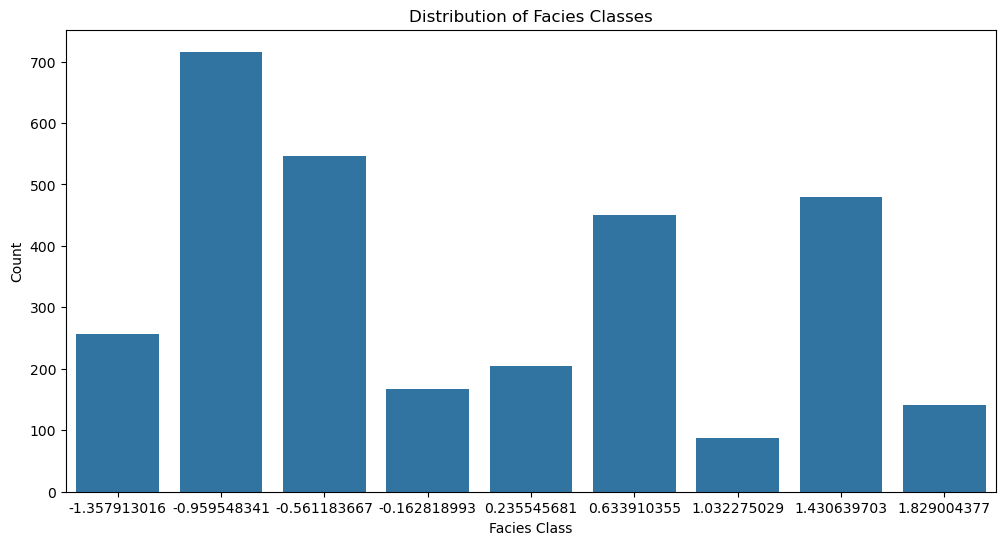

In [ ]:
# ----- PART 2: DATA VISUALIZATION -----

# Plot 1: Distribution of facies classes
plt.figure(figsize=(12, 6))
sns.countplot(x='Facies', data=df)
plt.title('Distribution of Facies Classes')
plt.xlabel('Facies Class')
plt.ylabel('Count')
plt.savefig('visualizations/facies_distribution.png')


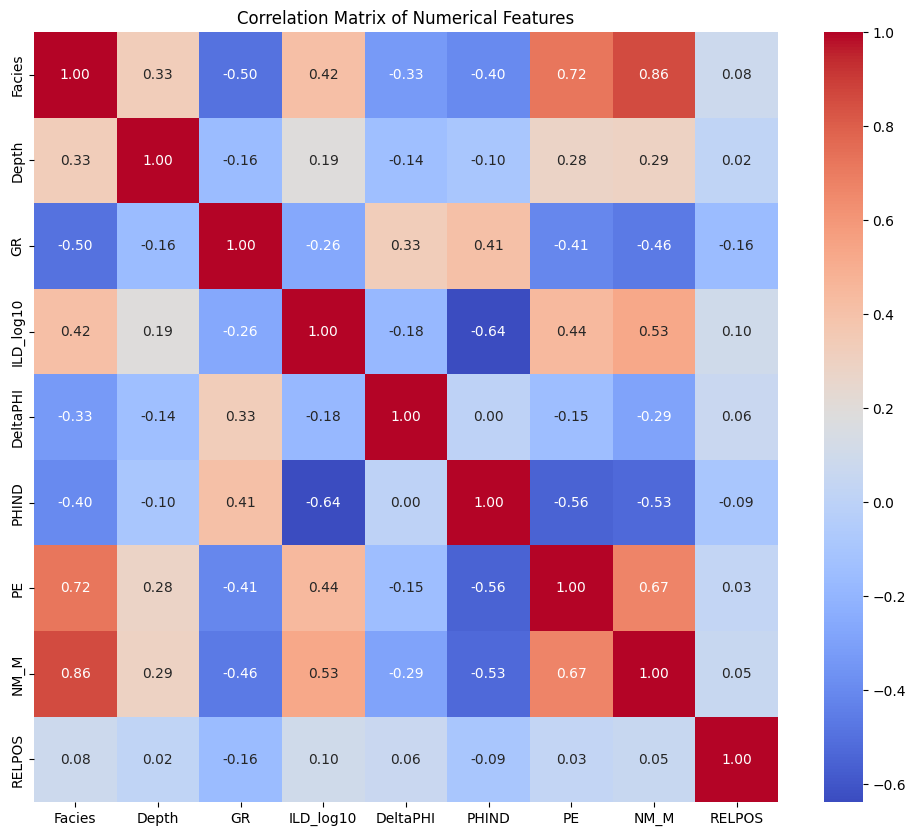

In [ ]:
# Plot 2: Correlation heatmap of numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('visualizations/correlation_heatmap.png')


<Figure size 1500x1200 with 0 Axes>

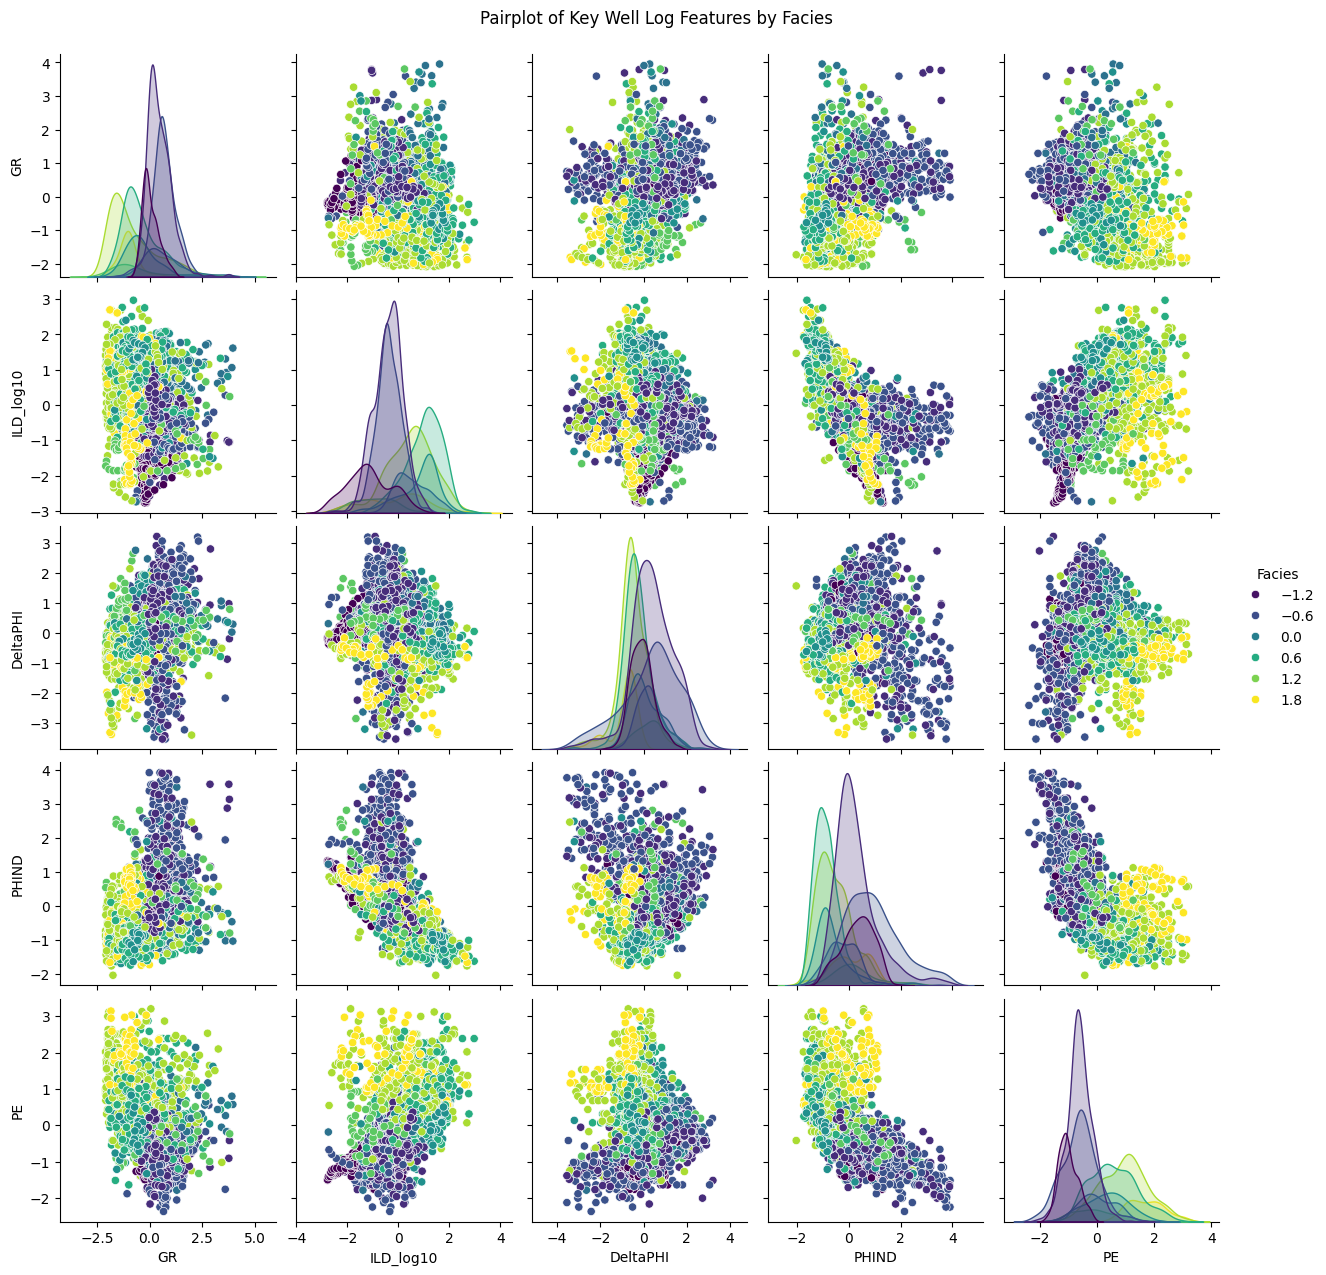

In [ ]:
# Plot 3: Pairplot of key features colored by facies
# Select important features to avoid overcrowding
key_features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'Facies']
plt.figure(figsize=(15, 12))
sns.pairplot(df[key_features], hue='Facies', palette='viridis')
plt.suptitle('Pairplot of Key Well Log Features by Facies', y=1.02)
plt.savefig('visualizations/pairplot.png')


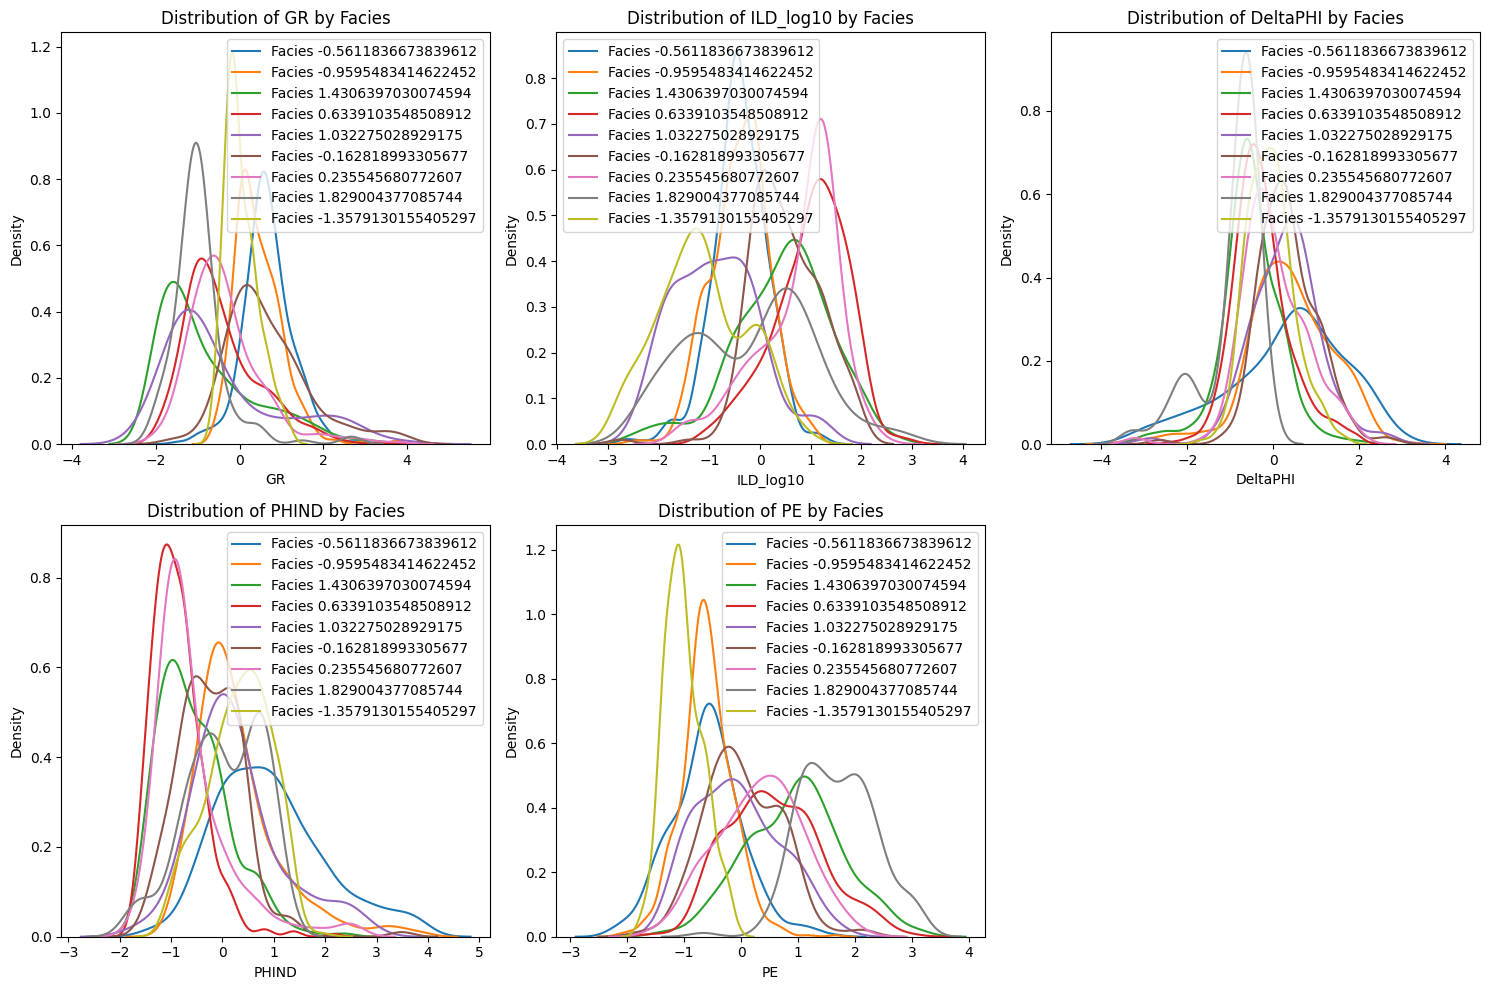

In [ ]:
# Plot 4: Feature distributions by facies - demonstrates non-linear separability
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features[:-1]):  # Exclude 'Facies'
    plt.subplot(2, 3, i+1)
    for facies in df['Facies'].unique():
        subset = df[df['Facies'] == facies][feature]
        if not subset.empty:  # Check if subset has data
            sns.kdeplot(subset, label=f'Facies {facies}')
    plt.title(f'Distribution of {feature} by Facies')
    plt.legend()
plt.tight_layout()
plt.savefig('visualizations/feature_distributions.png')


In [ ]:
# ----- PART 3: DATA PREPROCESSING -----

print("\n--- Preprocessing data ---")

# Features and target
X = df.drop(columns=['Facies', 'Formation', 'Well Name', 'Depth'])  # Features
y = df['Facies']  # Target
# Print feature and target information
print("Features shape:", X.shape)
print("Feature columns:", X.columns.tolist())
print("Target shape:", y.shape)
print("Unique target values:", y.unique())
# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print("Encoded target values:", np.unique(y_encoded))
print("Mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))



--- Preprocessing data ---
Features shape: (3051, 7)
Feature columns: ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
Target shape: (3051,)
Unique target values: [-0.56118367 -0.95954834  1.4306397   0.63391035  1.03227503 -0.16281899
  0.23554568  1.82900438 -1.35791302]
Encoded target values: [0 1 2 3 4 5 6 7 8]
Mapping: {np.float64(-1.3579130155405297): np.int64(0), np.float64(-0.9595483414622452): np.int64(1), np.float64(-0.5611836673839612): np.int64(2), np.float64(-0.162818993305677): np.int64(3), np.float64(0.235545680772607): np.int64(4), np.float64(0.6339103548508912): np.int64(5), np.float64(1.032275028929175): np.int64(6), np.float64(1.4306397030074594): np.int64(7), np.float64(1.829004377085744): np.int64(8)}


In [ ]:
# Split data into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("\nData split sizes:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")



Data split sizes:
Training set: 2135 samples (70.0%)
Validation set: 458 samples (15.0%)
Test set: 458 samples (15.0%)


In [ ]:
# Scale features using StandardScaler
# For KNN and SVM, scaling is crucial for distance-based calculations
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'models/scaler.pkl')

print("Preprocessing completed successfully!")


Preprocessing completed successfully!


In [ ]:
# ----- PART 4: K-NEAREST NEIGHBORS (KNN) MODEL -----

print("\n--- Building K-Nearest Neighbors (KNN) model ---")

# Find optimal K value using cross-validation
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


--- Building K-Nearest Neighbors (KNN) model ---


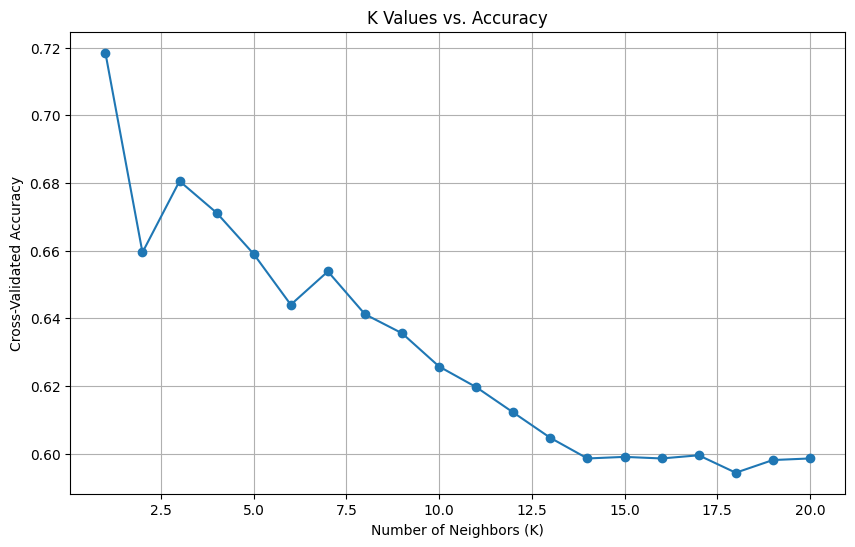

In [ ]:
# Plot the K value versus accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('K Values vs. Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.savefig('visualizations/knn_k_values.png')


In [ ]:
# Determine optimal K value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal K value: {optimal_k} with accuracy: {max(cv_scores):.4f}")

# Train KNN with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Save the KNN model
joblib.dump(knn, 'models/knn_model.pkl')

Optimal K value: 1 with accuracy: 0.7185


['models/knn_model.pkl']

In [ ]:
# Predict on validation set
y_val_pred_knn = knn.predict(X_val_scaled)

In [ ]:
# Evaluate KNN model
print("\nKNN Model Evaluation (Validation Set):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_knn))


KNN Model Evaluation (Validation Set):
Accuracy: 0.7183

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.76      0.78      0.77       108
           2       0.73      0.78      0.75        82
           3       0.61      0.68      0.64        25
           4       0.51      0.58      0.55        31
           5       0.65      0.61      0.63        67
           6       0.85      0.79      0.81        14
           7       0.76      0.62      0.69        72
           8       0.79      0.90      0.84        21

    accuracy                           0.72       458
   macro avg       0.72      0.73      0.72       458
weighted avg       0.72      0.72      0.72       458



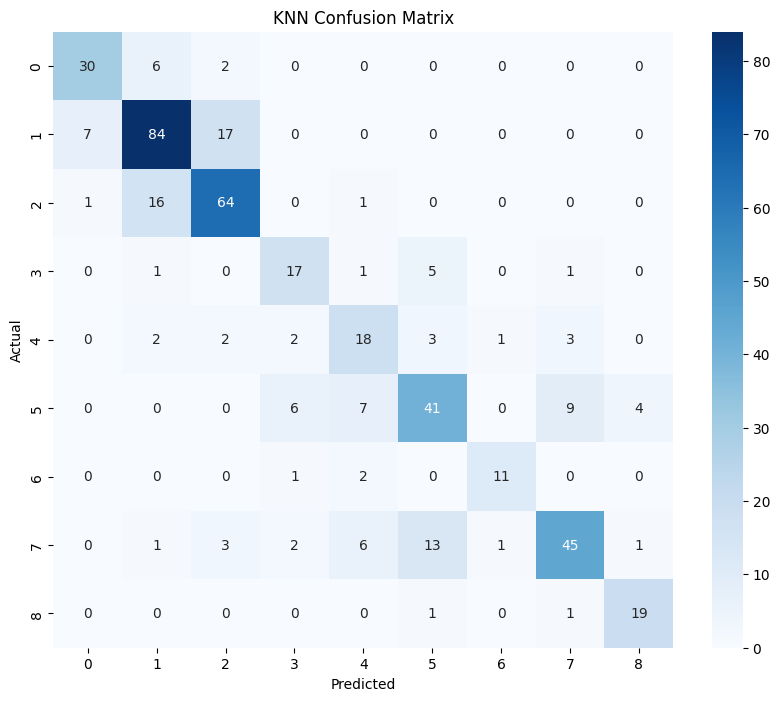

In [ ]:
# Create confusion matrix
cm_knn = confusion_matrix(y_val, y_val_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('visualizations/knn_confusion_matrix.png')

In [ ]:
# K-fold cross-validation
print("\nPerforming K-fold Cross-validation for KNN:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kf)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Performing K-fold Cross-validation for KNN:
Cross-validation scores: [0.69086651 0.74473068 0.67447307 0.735363   0.71662763]
Mean CV accuracy: 0.7124
Standard deviation: 0.0264


In [ ]:
#SVM setup for small C vlaue (soft margin)
svm = SVC(kernel='rbf' , C=1, gamma=0.1)
svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1)

In [ ]:
#SVM evaluation
print("\nSVM Model Evaluation for a small C value (Validation Set):")
y_val_pred_svm = svm.predict(X_val_scaled)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_svm):.4f}")
print(classification_report(y_val, y_val_pred_svm))


SVM Model Evaluation for a small C value (Validation Set):
Accuracy: 0.6004
              precision    recall  f1-score   support

           0       0.80      0.53      0.63        38
           1       0.63      0.76      0.69       108
           2       0.65      0.63      0.64        82
           3       0.48      0.48      0.48        25
           4       0.00      0.00      0.00        31
           5       0.48      0.63      0.54        67
           6       0.83      0.71      0.77        14
           7       0.56      0.61      0.58        72
           8       0.76      0.62      0.68        21

    accuracy                           0.60       458
   macro avg       0.58      0.55      0.56       458
weighted avg       0.57      0.60      0.58       458



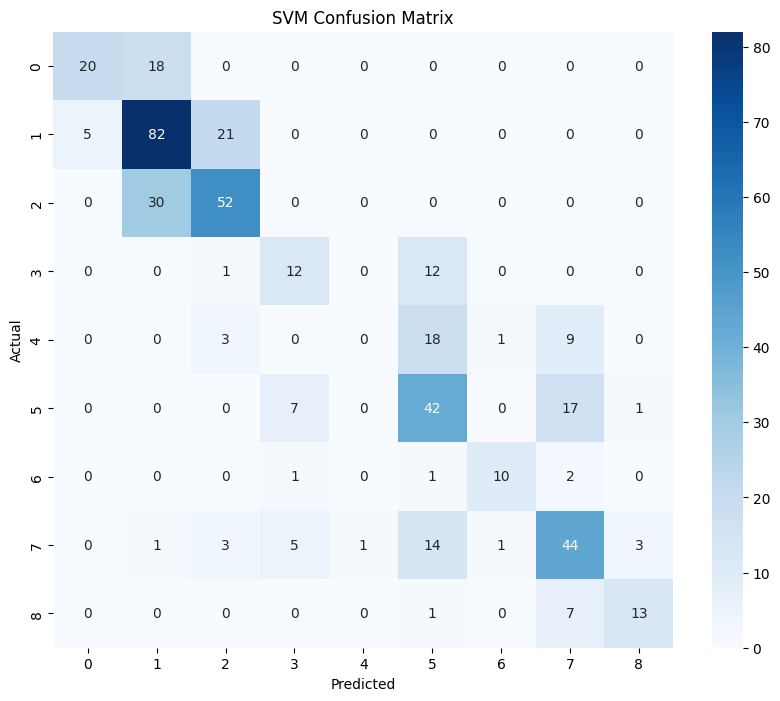

In [ ]:
#SVM confusion matrix for small C value
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('visualizations/svm_confusion_matrix.png')

In [ ]:
#SVM setup for medium C vlaue (soft margin)
svm = SVC(kernel='rbf' , C=10, gamma=0.1)
svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
#SVM evaluation
print("\nSVM Model Evaluation for a medium C value (Validation Set):")
y_val_pred_svm = svm.predict(X_val_scaled)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_svm):.4f}")
print(classification_report(y_val, y_val_pred_svm))


SVM Model Evaluation for a medium C value (Validation Set):
Accuracy: 0.6572
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.69      0.81      0.75       108
           2       0.67      0.67      0.67        82
           3       0.61      0.56      0.58        25
           4       0.67      0.13      0.22        31
           5       0.50      0.67      0.57        67
           6       0.82      0.64      0.72        14
           7       0.66      0.65      0.66        72
           8       0.89      0.76      0.82        21

    accuracy                           0.66       458
   macro avg       0.70      0.61      0.63       458
weighted avg       0.67      0.66      0.65       458



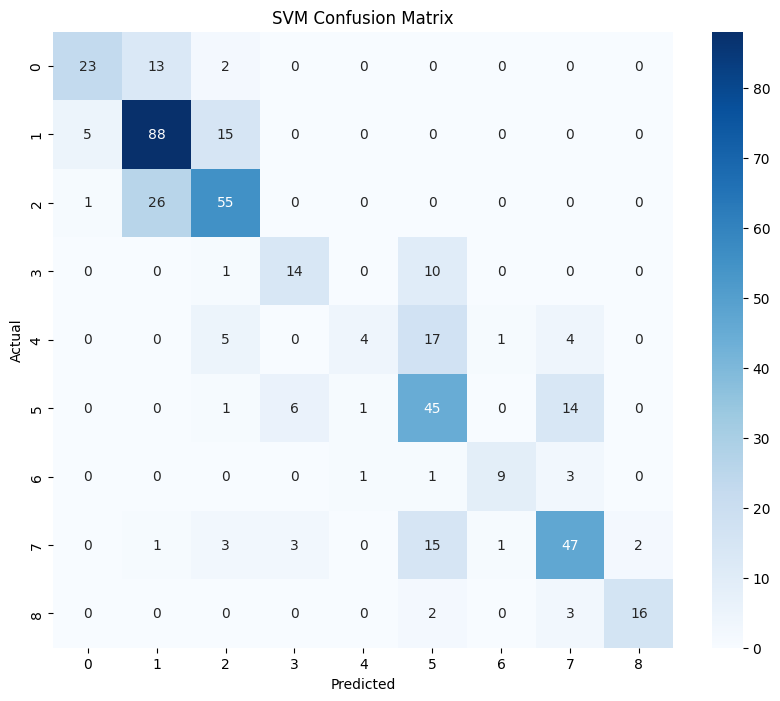

In [ ]:
#SVM confusion matrix for medium C value
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('visualizations/svm_confusion_matrix2.png')

In [ ]:
#SVM setup for large C vlaue (soft margin)
svm = SVC(kernel='rbf' , C=100, gamma=0.1)
svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.1)

In [ ]:
#SVM evaluation
print("\nSVM Model Evaluation for a large C value (Validation Set):")
y_val_pred_svm = svm.predict(X_val_scaled)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_svm):.4f}")
print(classification_report(y_val, y_val_pred_svm))


SVM Model Evaluation for a large C value (Validation Set):
Accuracy: 0.6900
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.70      0.85      0.77       108
           2       0.74      0.67      0.71        82
           3       0.60      0.72      0.65        25
           4       0.44      0.39      0.41        31
           5       0.61      0.61      0.61        67
           6       0.83      0.71      0.77        14
           7       0.72      0.64      0.68        72
           8       0.82      0.86      0.84        21

    accuracy                           0.69       458
   macro avg       0.70      0.68      0.68       458
weighted avg       0.69      0.69      0.69       458



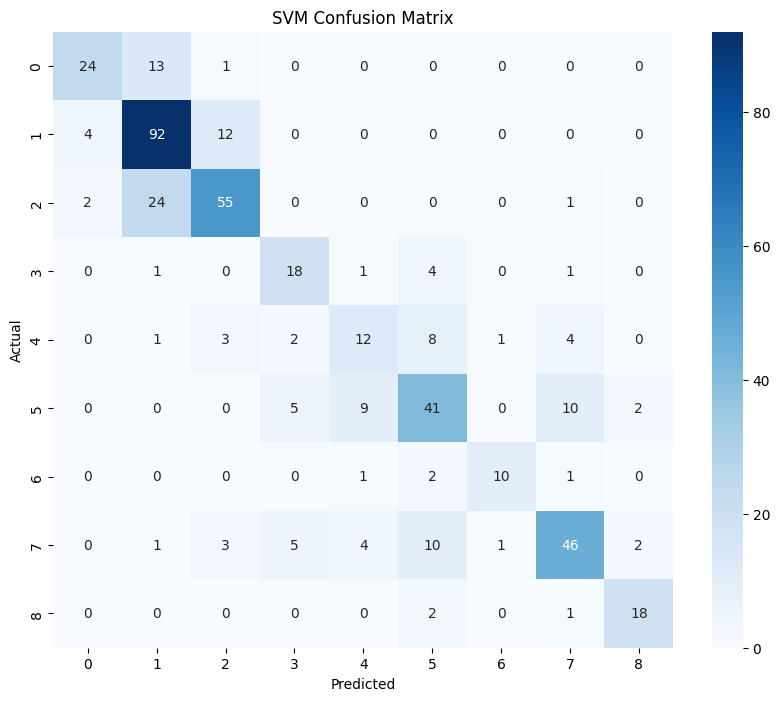

In [ ]:
#SVM confusion matrix for large C value
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('visualizations/svm_confusion_matrix3.png')

Task 4



In [ ]:
#In this step we should download Tensorflow
!pip install tensorflow #for Google Colab tensor flow is already installed


In [ ]:
import tensorflow as tensor #import the tensor
from tensorflow import keras

In [ ]:
dnn = keras.models.Sequential([
keras.layers.Input(shape=(X_train.shape[1],)),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(9, activation='softmax')
])

dnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history = dnn.fit(X_train, y_train, epochs=30, batch_size=32,
validation_data=(X_val, y_val))

validation_loss, validation_accuracy = dnn.evaluate(X_val, y_val)
print(f" The Validation Accuracy: {validation_accuracy * 100:.2f}%")

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2816 - loss: 1.9566 - val_accuracy: 0.4738 - val_loss: 1.4129
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 1.3046 - val_accuracy: 0.5699 - val_loss: 1.1604
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 1.0997 - val_accuracy: 0.5524 - val_loss: 1.0931
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5690 - loss: 1.0364 - val_accuracy: 0.5830 - val_loss: 1.0606
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5861 - loss: 0.9884 - val_accuracy: 0.5699 - val_loss: 1.0465
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6059 - loss: 0.9589 - val_accuracy: 0.5786 - val_loss: 1.0342
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6131 - loss: 0.9460 - val_accuracy: 0.5677 - val_loss: 1.0384
Epoch 8/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5940 - loss: 0.9432 - val_accuracy: 0.5917 - val_loss:

Task 5


In [ ]:
y_test_pred_knn = knn.predict(X_test)
y_test_pred_svm = svm.predict(X_test)
y_test_pred_dnn = dnn.predict(X_test)
y_test_pred_dnn = y_test_pred_dnn.argmax(axis=1)

 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
print("The Test Accuracy KNN:", accuracy_score(y_test, y_test_pred_knn))
print("The Test Accuracy SVM:", accuracy_score(y_test, y_test_pred_svm))
print("The Test Accuracy DNN:", accuracy_score(y_test, y_test_pred_dnn))

The Test Accuracy KNN: 0.74235807860262
The Test Accuracy SVM: 0.7117903930131004
The Test Accuracy DNN: 0.648471615720524
